In [1]:
cd C:/Users/envy/Downloads/Celebrity Faces Dataset

C:\Users\envy\Downloads\Celebrity Faces Dataset


In [4]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [2]:



import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

import pandas as pd
import re

from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from fastapi import FastAPI, Request, HTTPException, UploadFile, File
from fastapi.responses import HTMLResponse, FileResponse
from fastapi.staticfiles import StaticFiles
from fastapi.templating import Jinja2Templates
from io import BytesIO, StringIO
import cv2
import numpy as np
import logging
import tempfile
import os
from fastapi import FastAPI, File, UploadFile, HTTPException, Request
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from fastapi.templating import Jinja2Templates
from PIL import Image, ImageDraw
import os
import cv2
from deepface import DeepFace
import base64

metrics = ["cosine", "euclidean", "euclidean_l2"]
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]

from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from fastapi.templating import Jinja2Templates
from io import BytesIO
import os
import cv2
import numpy as np




In [18]:
pip install aiofiles

Note: you may need to restart the kernel to use updated packages.


In [3]:
import zipfile


zip_path = r"C:\Users\envy\Downloads\archive.zip"
extracted_path = r"C:\Users\envy\Downloads\extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Now you can access the contents of the extracted directory
database_directory = os.path.join(extracted_path, "Celebrity Faces Dataset")

# Check if the directory exists
if os.path.exists(database_directory):
    print(f"Database directory found: {database_directory}")
else:
    print(f"Database directory not found: {database_directory}")

Database directory found: C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset


In [4]:
# Define the allowed image file extensions
ALLOWED_EXTENSIONS = {'jpg', 'jpeg', 'png'}

# Load your database directory path
database_directory = r"C:\Users\envy\Downloads\Celebrity Faces Dataset"

In [5]:
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

allowed_file(r"C:\Users\envy\Downloads\Celebrity Faces Dataset\Tom Cruise\085_698d9a21.jpg")

True

In [6]:
def iterate_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            yield os.path.join(root, file)
            
for i in iterate_files(database_directory):
    print(i)

C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\001_fe3347c0.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\002_8f8da10e.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\003_57612506.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\004_f61e7d0c.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\005_582c121a.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\006_9135205d.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\007_cabbfcbb.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\008_d1f87068.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\009_fb3e6174.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\010_f99d79e3.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\011_7344ca35.jpg
C:\Users\envy\Downloads\Celebrity Faces Dataset\Angelina Jolie\012_cfcd4007.jpg
C:\Users\envy\Downloads\Celebrity Faces 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
db="C:/Users/envy/OneDrive/Desktop/temp_facerec"

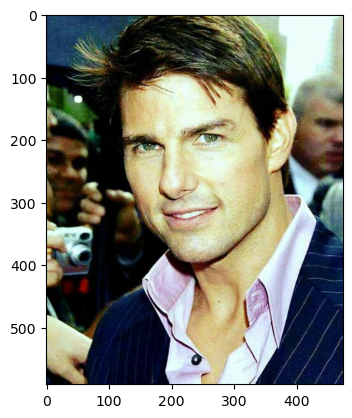

24-01-06 20:13:50 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-06 20:13:50 - There are 10 representations found in representations_facenet512.pkl
24-01-06 20:14:22 - find function lasts 31.92880654335022 seconds


In [8]:


def verify_face(face_image_path):
    db="C:/Users/envy/OneDrive/Desktop/temp_facerec"
    imgg = mpimg.imread(face_image_path)
    plt.imshow(imgg)
    plt.show()
    try:
        df = DeepFace.find(face_image_path, db, model_name=models[2], distance_metric=metrics[1], detector_backend=backends[4], enforce_detection=False)
        if (len(df)!=0):
            first_file_name = df[0]['identity'].iloc[0]
            normalized_path = os.path.normpath(os.path.join(db, first_file_name))
            return [True,normalized_path.split('\\')[-1].split('.')[-2]]
    except Exception as e:
            print(f"Error processing {str(e)}")

    return [False,"doesnt match to any"]
ans=verify_face(r"C:\Users\envy\Downloads\Celebrity Faces Dataset\Tom Cruise\079_fd41500f.jpg")

In [10]:
ans[1]


'TomCruise1'

In [10]:
os.remove('C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl')

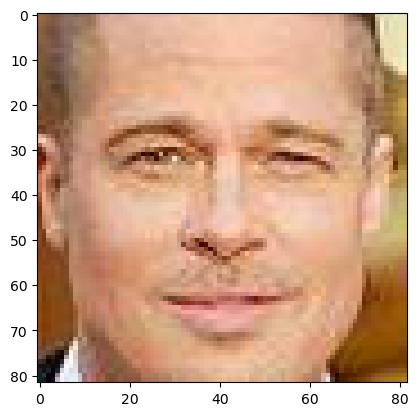

24-01-06 20:17:18 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-06 20:17:18 - There are 10 representations found in representations_facenet512.pkl


KeyboardInterrupt: 

In [9]:
def detect_and_verify_faces(image):
    try:
        if isinstance(image, str):  # Check if the input is a file path
            # Load the image using PIL
            pil_image = Image.open(image)

            # Convert the PIL image to OpenCV format
            image_cv2 = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
        elif isinstance(image, Image.Image):  # Check if the input is already a PIL Image
            pil_image = image
            image_cv2 = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
        else:
            raise HTTPException(status_code=400, detail="Invalid input type. Expecting file path or PIL Image.")
        
        # Detect faces using OpenCV
        gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Initialize the image for drawing
        draw = ImageDraw.Draw(pil_image)

        # Iterate through detected faces
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face region from the original image
            face_image = pil_image.crop((x, y, x + w, y + h))

            # Save the face image for verification
            db=r"C:\Users\envy\Downloads\files uploaded on webapp"
            temp_face_path = os.path.join(db, f"temp_face_{i+1}.jpg")
            face_image.save(temp_face_path)

            # Perform facial verification
            verified = verify_face(temp_face_path)[0]
            an=verify_face(temp_face_path)[1]
            print(an)
            
            #r"C:\Users\envy\Downloads\Celebrity Faces Dataset"

            # Draw a bounding box around the detected face
            draw.rectangle([x, y, x + w, y + h], outline="red", width=2)

            # Display the name on the bounding box if verified
            if verified:
                draw.text((x, y - 10), "Name:"+an, fill="green")
                os.remove('C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl')
            else:
                draw.text((x, y - 10), "Face not found", fill="green")

        result_image_path = os.path.join(db, "result_image.jpg")
        pil_image.save(result_image_path)

        # Example: Assuming verification is successful
        message = "Facial detection and verification completed. "

        return pil_image, message

    except Exception as e:
        print(f"Exception: {str(e)}")
        
detect_and_verify_faces(r"C:\Users\envy\Downloads\OIP.jpeg")


In [52]:
# FOR IMAGE WEB APP-DISPLAYED DYNAMICALLY:

app = FastAPI()
app.mount("/static", StaticFiles(directory=r"C:\Users\envy\OneDrive\Desktop\Static"), name="static")
templates = Jinja2Templates(directory=r"C:\Users\envy\OneDrive\Desktop\Templates")

@app.get("/", response_class=HTMLResponse)
async def read_root(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

@app.post("/detect_faces/")
async def create_upload_file(file: UploadFile = File(...)):
    # Check if the file has an allowed extension
    if not allowed_file(file.filename):
        raise HTTPException(status_code=400, detail="Only JPG, JPEG, and PNG files are allowed.")
        
    contents = await file.read()
    image = Image.open(BytesIO(contents))

    # Save the uploaded file
    upload_folder = r"C:\Users\envy\Downloads\files uploaded on webapp"
    file_path = os.path.join(upload_folder, file.filename)
    with open(file_path, "wb") as image_file:
        image_file.write(contents)

    # Detect and verify faces, draw bounding boxes, and display names if verified
    result_image, message = detect_and_verify_faces(image)
    buffered = BytesIO()
    result_image.save(buffered, format="JPEG")
    result_image_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return {"message": message, "image": result_image_base64}

INFO:     Started server process [24968]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:57420 - "GET / HTTP/1.1" 200 OK


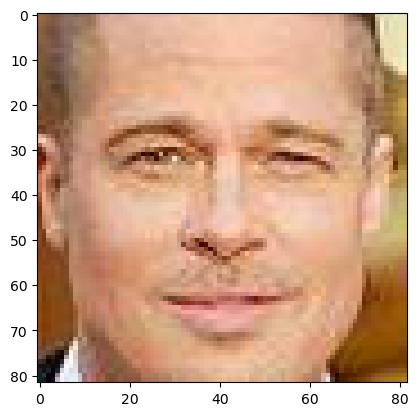

24-01-05 22:11:12 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-05 22:11:12 - There are 11 representations found in representations_facenet512.pkl
24-01-05 22:11:21 - find function lasts 8.194921016693115 seconds


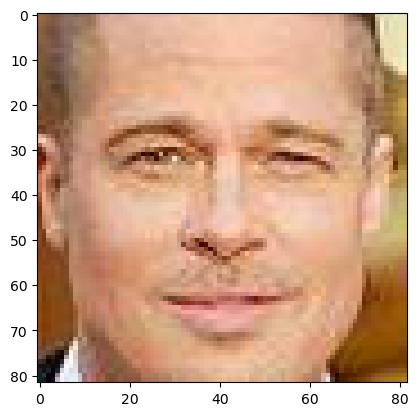

24-01-05 22:11:21 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-05 22:11:21 - There are 11 representations found in representations_facenet512.pkl
24-01-05 22:11:28 - find function lasts 7.072110652923584 seconds
BradPitt


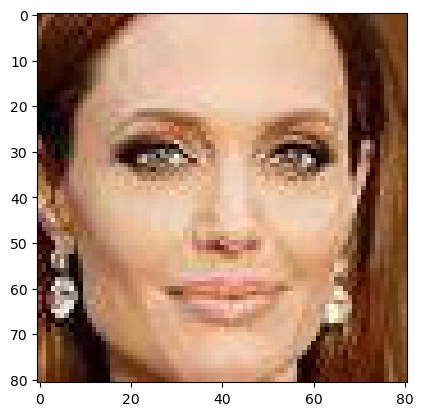

Finding representations: 100%|█████████████████████████████████████████████████████████| 11/11 [01:30<00:00,  8.27s/it]


24-01-05 22:12:59 - Representations stored in C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl file.Please delete this file when you add new identities in your database.
24-01-05 22:13:06 - find function lasts 98.14479780197144 seconds


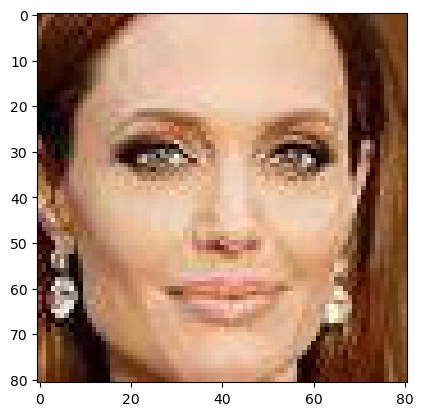

24-01-05 22:13:07 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-05 22:13:07 - There are 11 representations found in representations_facenet512.pkl
24-01-05 22:13:14 - find function lasts 7.242490291595459 seconds
AngelinaJolie1
INFO:     127.0.0.1:57421 - "POST /detect_faces/ HTTP/1.1" 200 OK


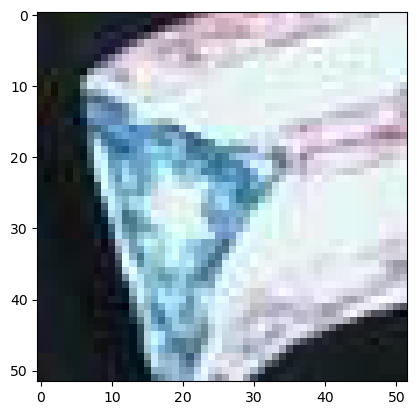

Finding representations: 100%|█████████████████████████████████████████████████████████| 11/11 [01:30<00:00,  8.22s/it]


24-01-05 22:19:58 - Representations stored in C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl file.Please delete this file when you add new identities in your database.
24-01-05 22:20:05 - find function lasts 97.47184491157532 seconds


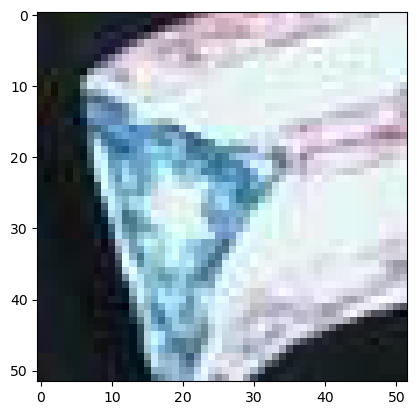

24-01-05 22:20:06 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-05 22:20:06 - There are 11 representations found in representations_facenet512.pkl
24-01-05 22:20:13 - find function lasts 7.047584056854248 seconds
TomCruise4


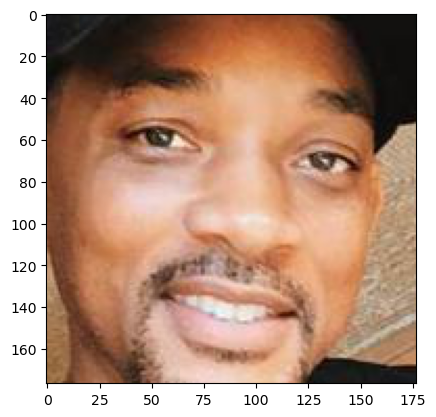

Finding representations: 100%|█████████████████████████████████████████████████████████| 11/11 [01:29<00:00,  8.09s/it]


24-01-05 22:21:42 - Representations stored in C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl file.Please delete this file when you add new identities in your database.
24-01-05 22:21:50 - find function lasts 97.21511220932007 seconds


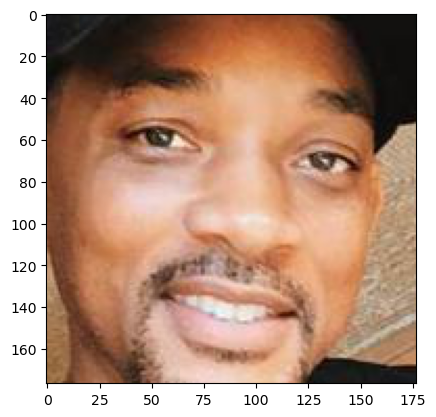

24-01-05 22:21:51 - ⚠️ Representations for images in C:/Users/envy/OneDrive/Desktop/temp_facerec folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-05 22:21:51 - There are 11 representations found in representations_facenet512.pkl
24-01-05 22:21:59 - find function lasts 7.981874942779541 seconds
WillSmith
INFO:     127.0.0.1:57456 - "POST /detect_faces/ HTTP/1.1" 200 OK


In [ ]:
import nest_asyncio
import uvicorn

if __name__ == "__main__":
    nest_asyncio.apply()
    uvicorn.run(app)

In [19]:
def process_video(file_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    video_capture = cv2.VideoCapture(file_path)
    
        # Get the video's frame width, height, and frames per second
    frame_width = int(video_capture.get(3))
    frame_height = int(video_capture.get(4))
    fps = int(video_capture.get(5))

    # Define the codec and create a VideoWriter object
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    annotated_video_path = f"C:/Users/envy/Downloads/files uploaded on webapp/annotated_{os.path.basename(file_path)}"
    out = cv2.VideoWriter(annotated_video_path, fourcc, fps, (frame_width, frame_height))

    
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        # Convert the frame to RGB for DeepFace
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Detect faces
        faces = face_cascade.detectMultiScale(rgb_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        for (x, y, w, h) in faces:
            # Crop and resize the face region
            face = rgb_frame[y:y+h, x:x+w]
            resized_face = cv2.resize(face, (160, 160))
            
            temp_path = r"C:\Users\envy\Downloads\files uploaded on webapp\temp_face_image.jpg"
            cv2.imwrite(temp_path, cv2.cvtColor(resized_face, cv2.COLOR_RGB2BGR))
            
            

            # Perform face verification
            result = verify_face(temp_path)
            
            # If the face matches, display the filepath
            if result[0]:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(frame, f"Match: {result[0]}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(frame, f"Matched to: {result[1]}", (x, y+h+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                os.remove('C:/Users/envy/OneDrive/Desktop/temp_facerec/representations_facenet512.pkl')
                
        out.write(frame)
        
    video_capture.release()
    out.release()

    return annotated_video_path
                

        
    


#process_video(r"C:\Users\envy\Videos\Captures\video3.mp4")

In [24]:
# FOR video WEB APP-saved in chosen location

from fastapi.responses import StreamingResponse

app = FastAPI()
app.mount("/static", StaticFiles(directory=r"C:\Users\envy\OneDrive\Desktop\Static"), name="static")
templates = Jinja2Templates(directory=r"C:\Users\envy\OneDrive\Desktop\Templates")
    
@app.get("/", response_class=HTMLResponse)
def home(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

@app.post("/uploadfile/")
async def create_upload_file(file: UploadFile = File(...)):
    print(file.content_type)
    if file.content_type.startswith('video'):
        video_path = f"C:/Users/envy/Downloads/files uploaded on webapp/{file.filename}"
        with open(video_path, "wb") as video_file:
            video_file.write(file.file.read())
        
       # Process the video and get the annotated video path
        annotated_video_path = process_video(video_path)

        # Check if the annotated video file exists
        if os.path.exists(annotated_video_path):
            # Serve the annotated video file for streaming
            return FileResponse(annotated_video_path, media_type="video/mp4", filename="annotated_video.mp4")
        else:
            raise HTTPException(status_code=500, detail="Annotated video file not found.")
    else:
        raise HTTPException(status_code=415, detail="Unsupported media type, please upload a video file.")



In [27]:
import nest_asyncio
import uvicorn



if __name__ == "__main__":
    nest_asyncio.apply()
    uvicorn.run(app)

INFO:     Started server process [18808]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [18808]
